<center><h1>Fundamentos Data Science parte 2</h1><center>
    Autor: Walther Becks

## Desafío 2: Rendimiento escolar

Lo contactan de una escuela Portuguesa para generar **un modelo que identifique aquellos
alumnos** que presentan un bajo desempeño académico, **medido en el promedio final del año
escolar**. Para ello le envían un archivo con registros sociodemográficos y conductuales de
los alumnos de dos escuelas **para perfilar a los estudiantes**.
De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas
asociadas a aspectos ambientales del alumno (de famrel a health) y ver si éstas se
pueden **abstraer en categorías latentes.**

**Datos Asociados: students.csv**

## Hito 1: Análisis preliminar

1. Se nos pide desarrollar uno modelo predictivo a partir de las notas finales del alumno (G3) para identificar aquellos alumnos con bajo desempeño académico. Junto a eso, nos solicitan la modelación de 3 modelos descriptivos (G1, G2, G3), es por esto que como primer paso debemos validar los 3 primeros desde la econometría y uno desde el ML.

2. Estamos frente a un problema de **Regresión** ya que los **vectores objetivo** son de naturaleza numérica.

**Librerías a utilizar:** 

1. pandas == 1.2.0
2. numpy == 1.20.3
3. scipy == 1.7.3  
4. matplotlib == 3.0.3
5. seaborn == 0.11.2 
6. statsmodels == 0.13.2
7. conda == 4.8.3
8. python == 3.7.3
9. missingno == 0.5.1

-------------

## Hito 2

### Importe de librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno
sns.set_style('darkgrid')

import statsmodels.api as sm
import statsmodels.formula.api as smf

warnings.filterwarnings('ignore')

#para dsps:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import functions
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams["figure.dpi"] = 200
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

C:\Users\Walther\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\Walther\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path

### Importe de datos

In [2]:
df = pd.read_csv('students.csv', sep = '|', encoding = 'latin1')
df = df.replace(['nulidade', 'sem validade', 'zero'], np.nan).drop('Unnamed: 0', axis = 1)
print(f"Contamos con {df.shape[0]} filas y {df.shape[1]} columnas")
df.head()

Contamos con 395 filas y 33 columnas


school sex   age address famsize Pstatus Medu Fedu     Mjob      Fjob  \
0     GP   F   NaN       U     GT3       A    4    4  at_home   teacher   
1     GP   F  "17"       U     GT3       T    1    1  at_home     other   
2     GP   F  "15"       U     LE3       T    1    1  at_home     other   
3     GP   F  "15"       U     GT3       T    4    2   health  services   
4     GP   F   NaN       U     GT3       T    3    3    other     other   

   reason guardian traveltime studytime failures schoolsup famsup paid  \
0  course   mother          2         2        0       yes     no   no   
1  course   father          1         2        0        no    yes   no   
2   other   mother          1         2        3       yes     no  yes   
3    home   mother          1         3        0        no    yes  yes   
4    home   father          1         2        0        no    yes  yes   

  activities nursery higher internet romantic famrel freetime goout Dalc Walc  \
0         no     yes    yes       no       no      4        3   "4"    1    1   
1         no      no    yes      yes       no      5        3   "3"    1    1   
2         no     yes    yes      yes       no      4        3   "2"    2    3   
3        yes     yes    yes      yes      yes      3        2   "2"    1    1   
4         no     yes    yes       no       no      4        3   "2"    1    2   

  health absences   G1  G2  G3  
0    "3"        6    5   6   6  
1    "3"        4    5   5   6  
2    "3"       10  NaN   8  10  
3    "5"        2   15  14  15  
4    "5"        4    6  10  10

### Limpieza de base de datos

#### Valores nulos

In [3]:
df = df.replace(to_replace='?',value= np.nan)
df.apply(lambda x: f"{round((x[x.isna()].shape[0]/x.shape[0])*100, 2)}%").sort_values(ascending = False).to_frame().rename(columns = {0:'% nulos'})

% nulos
schoolsup    2.03%
Pstatus      1.52%
higher       1.52%
nursery      1.52%
Mjob         1.52%
school       1.27%
studytime    1.27%
Walc         1.27%
goout        1.27%
famrel       1.27%
activities   1.27%
failures     1.27%
famsup       1.27%
Fedu         1.27%
famsize      1.01%
guardian     1.01%
reason       1.01%
G1           1.01%
absences     1.01%
health       1.01%
age          1.01%
Dalc         0.76%
traveltime   0.76%
internet     0.76%
Medu         0.76%
sex          0.76%
G3           0.76%
romantic     0.51%
freetime     0.51%
address      0.51%
paid         0.25%
Fjob          0.0%
G2            0.0%

In [4]:
df_droped_na = df.dropna()
print(f"Se limpió la base de valores nulos, con lo que se consiguió conservar un {round(df_droped_na.shape[0]/df.shape[0]*100)}% de los datos, se perdieron {df.shape[0]-df_droped_na.shape[0]} filas.")

Se limpió la base de valores nulos, con lo que se consiguió conservar un 72% de los datos, se perdieron 111 filas.


In [5]:
df_droped_na.head()

school sex   age address famsize Pstatus Medu Fedu      Mjob      Fjob  \
1     GP   F  "17"       U     GT3       T    1    1   at_home     other   
3     GP   F  "15"       U     GT3       T    4    2    health  services   
5     GP   M  "16"       U     LE3       T    4    3  services     other   
6     GP   M  "16"       U     LE3       T    2    2     other     other   
7     GP   F  "17"       U     GT3       A    4    4     other   teacher   

       reason guardian traveltime studytime failures schoolsup famsup paid  \
1      course   father          1         2        0        no    yes   no   
3        home   mother          1         3        0        no    yes  yes   
5  reputation   mother          1         2        0        no    yes  yes   
6        home   mother          1         2        0        no     no   no   
7        home   mother          2         2        0       yes    yes   no   

  activities nursery higher internet romantic famrel freetime goout Dalc Walc  \
1         no      no    yes      yes       no      5        3   "3"    1    1   
3        yes     yes    yes      yes      yes      3        2   "2"    1    1   
5        yes     yes    yes      yes       no      5        4   "2"    1    2   
6         no     yes    yes      yes       no      4        4   "4"    1    1   
7         no     yes    yes       no       no      4        1   "4"    1    1   

  health absences  G1  G2  G3  
1    "3"        4   5   5   6  
3    "5"        2  15  14  15  
5    "5"       10  15  15  15  
6    "3"        0  12  12  11  
7    "1"        6   6   5   6

#### Recodificación de las variables

1. Utilizando el importe de functions, recodificaremos y binarizaremos las variables
2. Normalizaremos las varibles numéricas (excepto las binarias).

In [6]:
df_recodificacion = functions.recodificaciones_d2(df_droped_na)  
df_bin = functions.normalizar(df_recodificacion,exclude = df_recodificacion.select_dtypes('uint8').columns)

print(df_bin.shape)
print(f"**De las {df_droped_na.shape[1]} columnas originales, se procedió a agregar {df_bin.shape[1]-df_droped_na.shape[1]} columnas binarias, dejando un total {df_bin.shape[1]} columnas**")
df_bin.head()

(284, 42)
**De las 33 columnas originales, se procedió a agregar 9 columnas binarias, dejando un total 42 columnas**


age      Medu      Fedu  traveltime  studytime  failures  absences  \
1  0.227570 -1.620078 -1.394201   -0.683631  -0.058448 -0.457606 -0.194699   
3 -1.329774  1.118625 -0.477643   -0.683631   1.127213 -0.457606 -0.439907   
5 -0.551102  1.118625  0.438915   -0.683631  -0.058448 -0.457606  0.540926   
6 -0.551102 -0.707177 -0.477643   -0.683631  -0.058448 -0.457606 -0.685115   
7  0.227570  1.118625  1.355473    0.754527  -0.058448 -0.457606  0.050509   

     famrel  freetime     goout     Dalc      Walc    health        G1  \
1  1.202119 -0.182751 -0.078500 -0.54848 -0.964107 -0.475138 -1.803813   
3 -1.066331 -1.162020 -1.007412 -0.54848 -0.964107  1.041033  1.236441   
5  1.202119  0.796518 -1.007412 -0.54848 -0.186248  1.041033  1.236441   
6  0.067894  0.796518  0.850413 -0.54848 -0.964107 -0.475138  0.324365   
7  0.067894 -2.141288  0.850413 -0.54848 -0.964107 -1.991308 -1.499787   

         G2        G3  school_MS  sex_M  address_U  famsize_LE3  Pstatus_T  \
1 -1.488656 -0.962431          0      0          1            0          1   
3  0.886503  1.008702          0      0          1            0          1   
5  1.150410  1.008702          0      1          1            1          1   
6  0.358690  0.132643          0      1          1            1          1   
7 -1.488656 -0.962431          0      0          1            0          0   

   schoolsup_yes  famsup_yes  paid_yes  activities_yes  nursery_yes  \
1              0           1         0               0            0   
3              0           1         1               1            1   
5              0           1         1               1            1   
6              0           0         0               0            1   
7              1           1         0               0            1   

   higher_yes  internet_yes  romantic_yes  Mjob_health  Mjob_other  \
1           1             1             0            0           0   
3           1             1             1            1           0   
5           1             1             0            0           0   
6           1             1             0            0           1   
7           1             0             0            0           1   

   Mjob_services  Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  \
1              0             0            0           1              0   
3              0             0            0           0              1   
5              1             0            0           1              0   
6              0             0            0           1              0   
7              0             0            0           0              0   

   Fjob_teacher  reason_home  reason_other  reason_reputation  \
1             0            0             0                  0   
3             0            1             0                  0   
5             0            0             0                  1   
6             0            1             0                  0   
7             1            1             0                  0   

   guardian_mother  guardian_other  
1                0               0  
3                1               0  
5                1               0  
6                1               0  
7                1               0

### Analisis G1

In [7]:
df_bin.corr()['G1'].to_frame().assign(absolute = df_bin.corr()['G1'].abs()).sort_values(by='absolute', ascending = False).drop('absolute',axis=1)[1:]

G1
G2                 0.848606
G3                 0.803384
failures          -0.328676
goout             -0.226923
schoolsup_yes     -0.206195
Medu               0.189984
Fedu               0.181079
Fjob_teacher       0.165586
higher_yes         0.153411
Fjob_other        -0.139045
health            -0.128751
studytime          0.126020
Walc              -0.122382
Mjob_other        -0.120695
Mjob_health        0.110589
famsup_yes        -0.104258
reason_reputation  0.092036
sex_M              0.081908
Dalc              -0.080415
traveltime        -0.078746
famsize_LE3        0.063291
address_U          0.062999
Mjob_services      0.061693
absences          -0.055033
nursery_yes        0.054626
Mjob_teacher       0.050217
reason_other       0.043166
age               -0.042289
guardian_other    -0.040076
internet_yes       0.039786
activities_yes    -0.034559
famrel             0.033950
Fjob_services      0.027064
freetime           0.026875
romantic_yes      -0.024194
Pstatus_T         -0.013917
paid_yes           0.013879
reason_home       -0.011489
Fjob_health        0.009594
guardian_mother    0.007943
school_MS         -0.004857

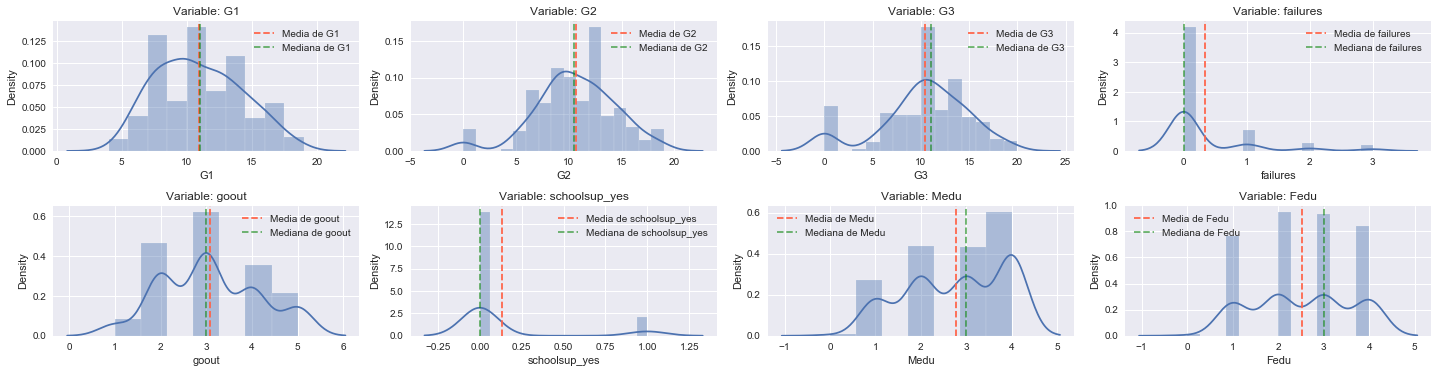

In [8]:
plt.figure(figsize = (20,10))
functions.plot_hist(df_recodificacion, ['G1','G2','G3', 'failures', 'goout', 'schoolsup_yes','Medu', 'Fedu'])
plt.tight_layout()

* Podemos observar en G1, G2 y G3 que a medida que pasa el tiempo, los alumnos con mala calificación se acrecentan

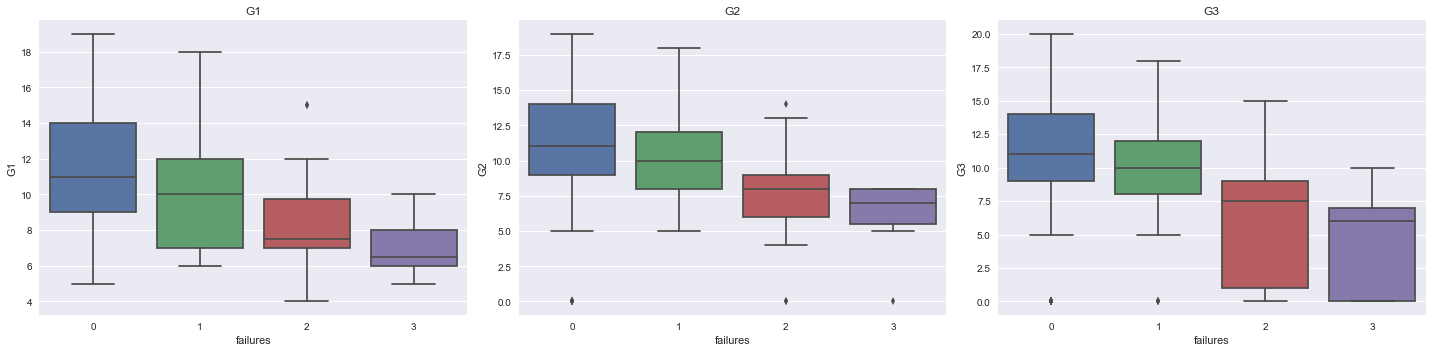

In [9]:
plt.figure(figsize = (20,5))
for index, column in enumerate(['G1', 'G2', 'G3']):
    
    plt.subplot(1,3,index+1)
    plt.title(column)
    sns.boxplot('failures',column, data = df_recodificacion)
    
    
plt.tight_layout()

* Podemos observar que a medida que avanza el año, en G3 se acentúan los peores valores

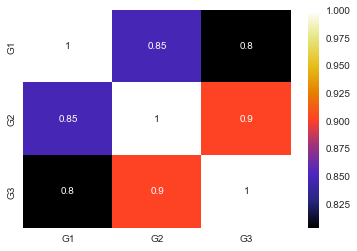

In [10]:
sns.heatmap(df_recodificacion.loc[:, ['G1','G2','G3']].corr(), cmap = 'CMRmap', annot = True)

* Podemos observar una fuerte correlación entre las notas de (G1, G2) y (G2 y G3)